**HR Analysis,prediction and visulaization**

#Breakdown of this notebook:

1)importing the Libraries

2)Loading the dataset

3)Understanding the Attrition problem and the Dataset

4)Data Visualozation:
    
plot a correlatoin map for all numeric variables
overtimes
Maritial Status
job Ride
Gender
Education Field
Department
Business Travel
Relation between Overtime and age
Total Working Years
Education Level
Number of Companies worked
Distance from Home

5)Predection of Attrition : LGBM classifier

**import the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.Listdir(".../input"))
import warnings
warnings.filterwarnings("ignore")

**Understanding the Attition Problem and the Dataset**

HR Analysis helps us with interpreting orgnizational data.it does the peope-related in the data and helps
the HR Department take the appropriate steps to keep the orgnization running smoothly and profitably.
Attrition is a corporate setup is one of the complex challenges that the people mananger and HRs personnel
have to deal with.

Intresting,machine learning module can be deplyoed potential attrition case,thereby helping the appropriate
HR Personal take the necessary steps to retain the employee.

**Loading the Dataset**

In [2]:
data=pd.read_csv("D:\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

**print first 10 Dataset**

In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


**Getting information about the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Describe The dataset**

In [5]:
data.describe() #Genrate describe stastics that summarize the central tendency,display,discription and

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Plot a correction man all numeric variables**

<AxesSubplot:>

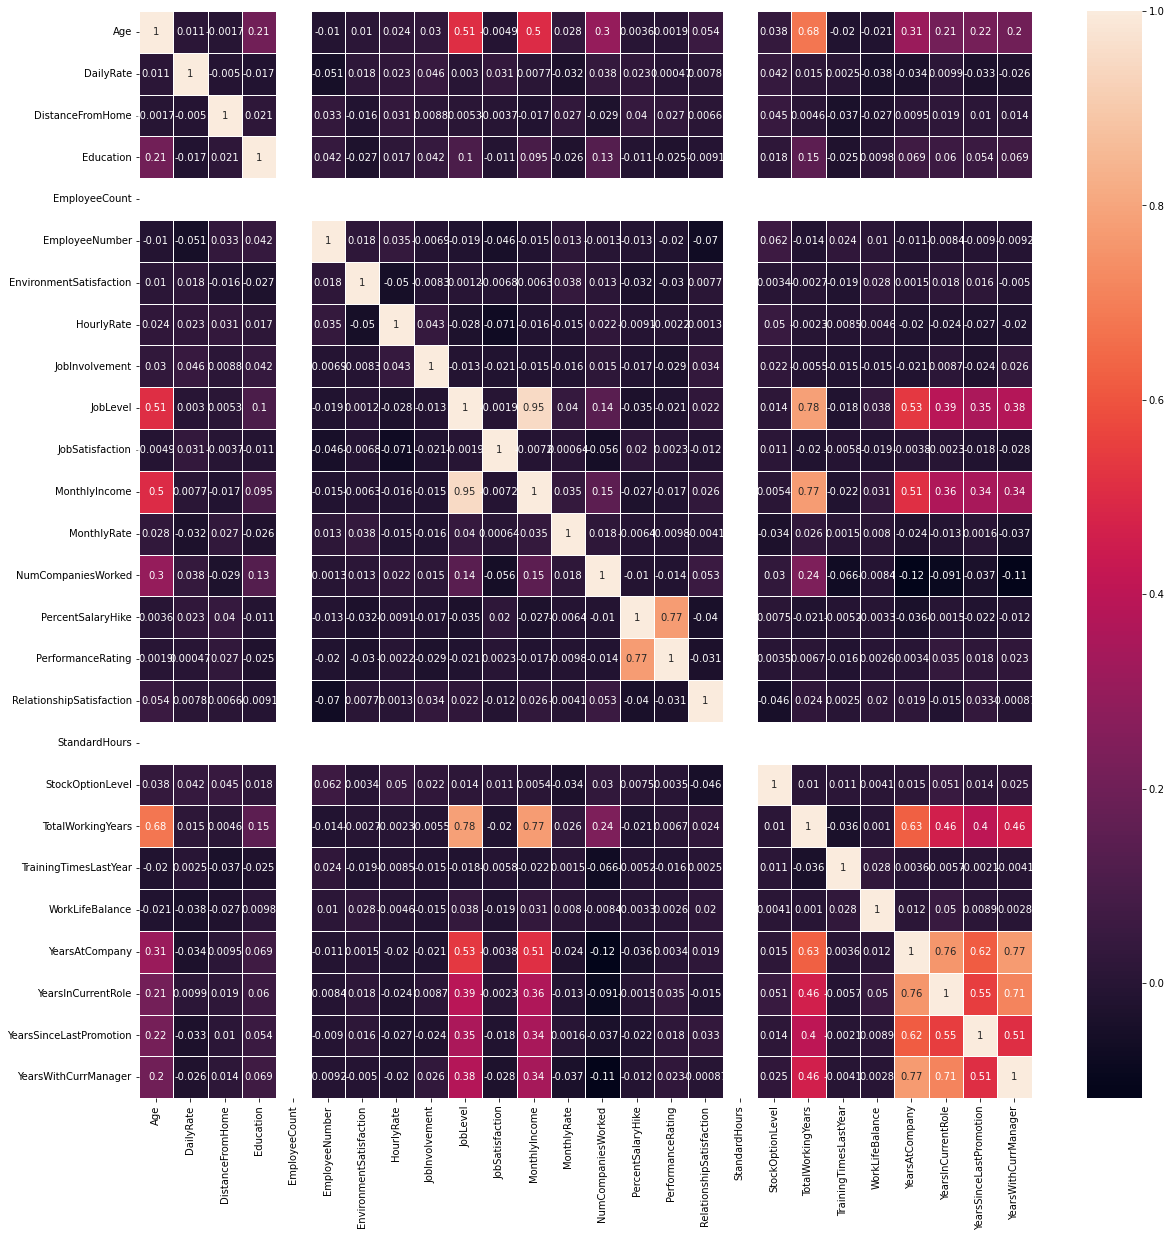

In [6]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidth=.5)

**we'd now explore the number of people based on diffrent criteria  to see which criteria is the dominate one for
attrition**

Text(0.5, 1.0, 'OverTime')

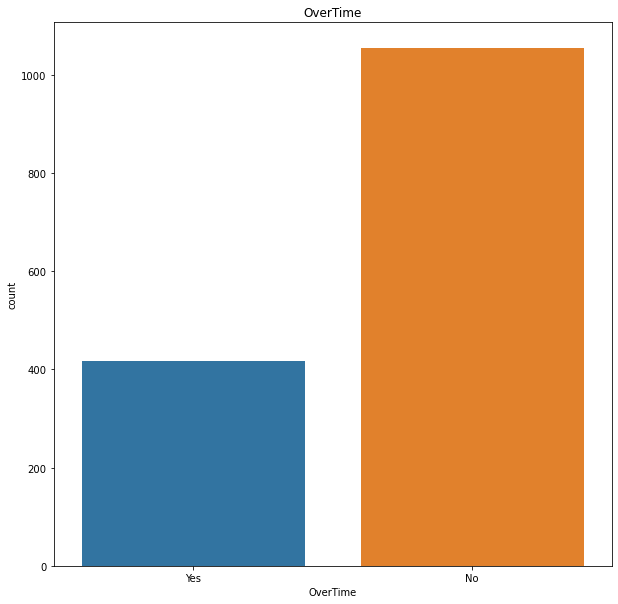

In [7]:
# count of people doing overtime
sns.countplot(data['OverTime'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

the count of people doing overtime < the count of people not doing overtime

Text(0.5, 1.0, 'Martial Status')

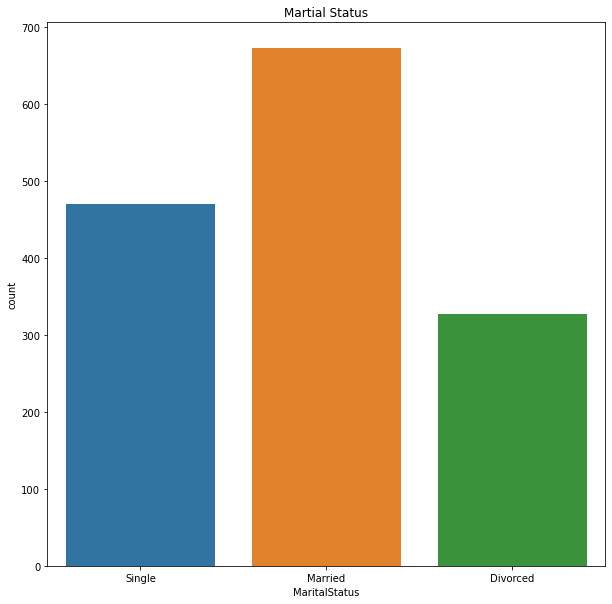

In [8]:
# Couont of people doing based on their martial status
sns.countplot(data['MaritalStatus'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')


Text(0.5, 1.0, 'Job Role')

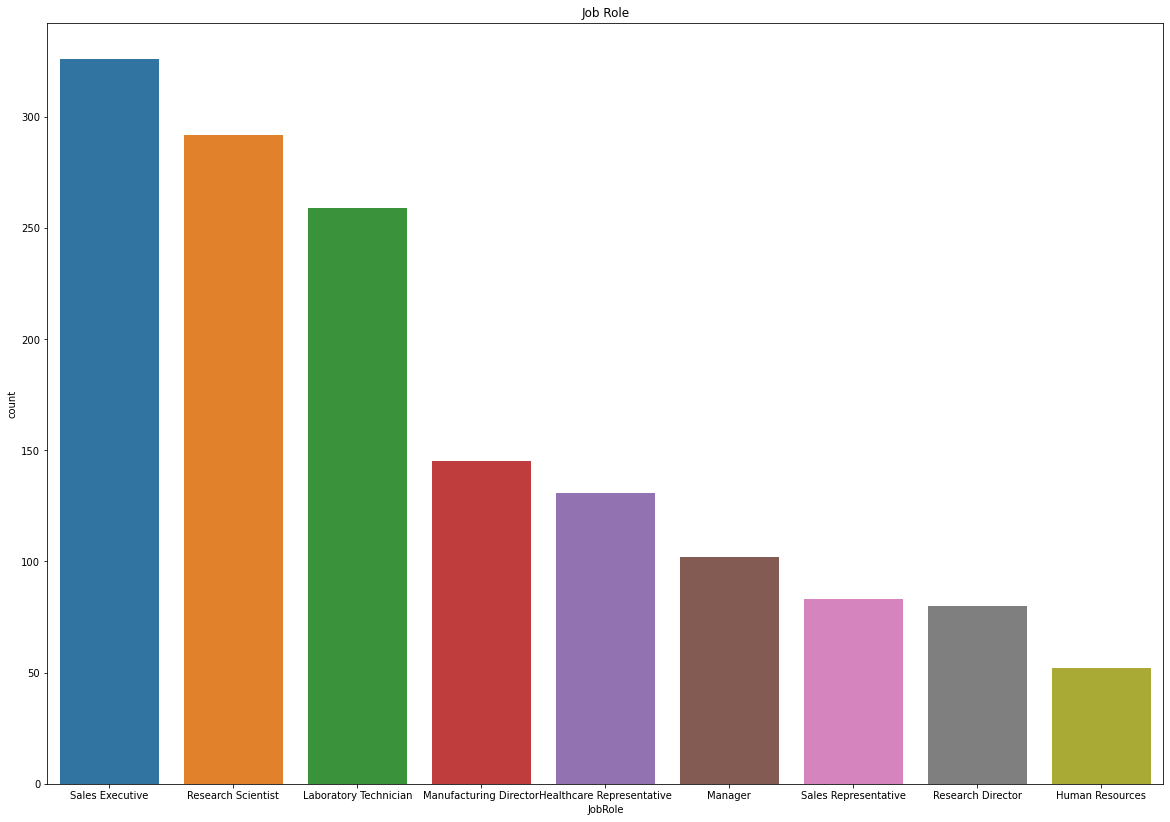

In [9]:
# Count of people based on their Jobrole.
sns.countplot(data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Job Role')


Text(0.5, 1.0, 'Gender')

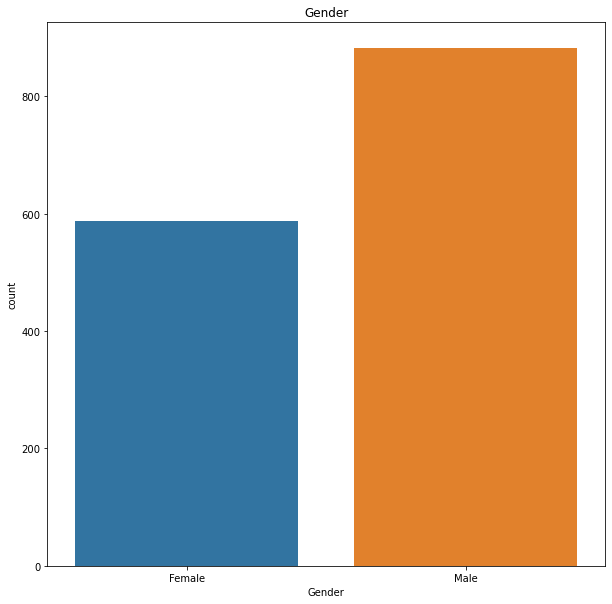

In [10]:
# count of people based on their Gender
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

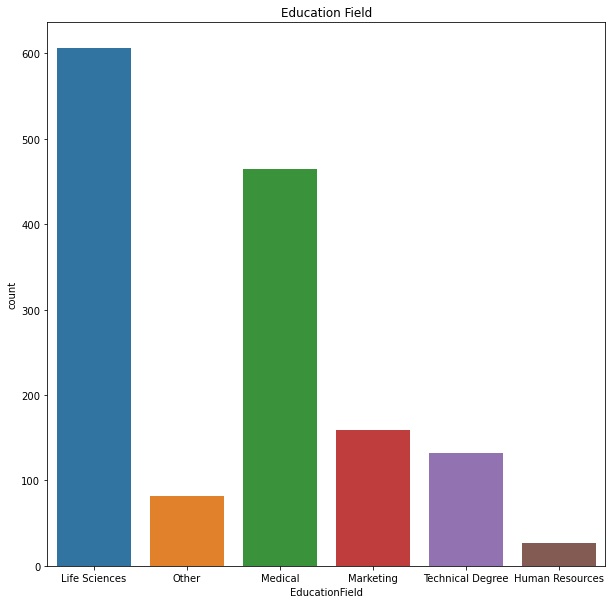

In [11]:
# count of people based on their field of education
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

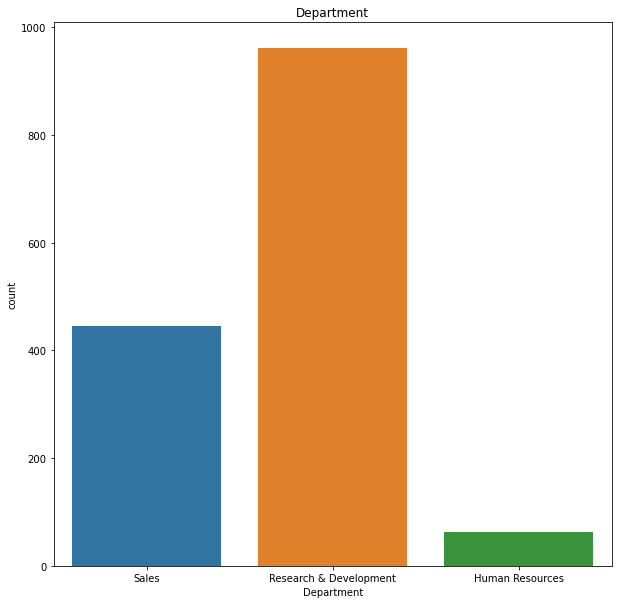

In [13]:
# Count of people based on the department in which they work.
sns.countplot(data['Department'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

Text(0.5, 1.0, 'Business travel')

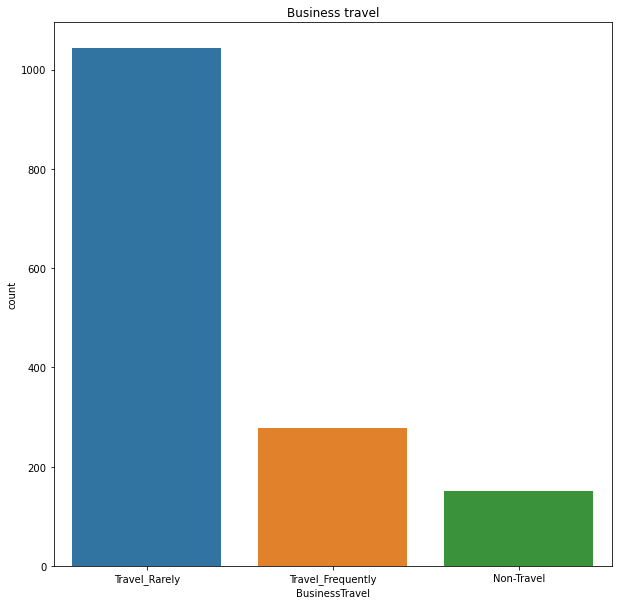

In [14]:
# Count of people based on their travel frequency
sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

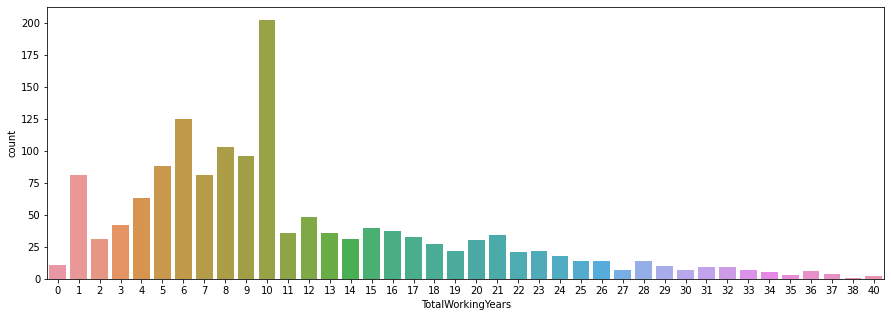

In [15]:
# Count of people based on their total working years
plt.subplots(figsize=(15,5))
sns.countplot(data.TotalWorkingYears)

<AxesSubplot:xlabel='Education', ylabel='count'>

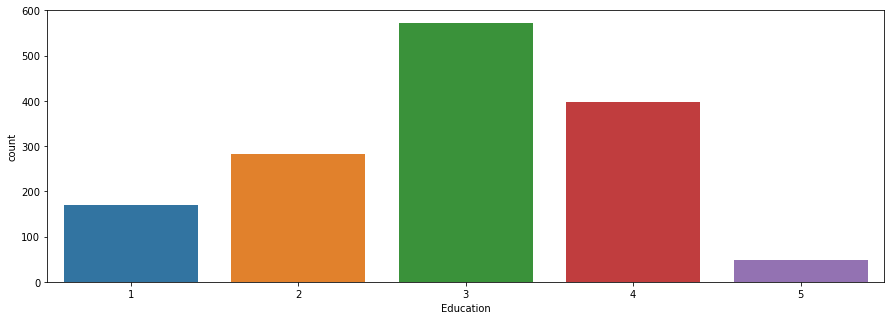

In [18]:
plt.subplots(figsize=(15,5))
sns.countplot(data.Education)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

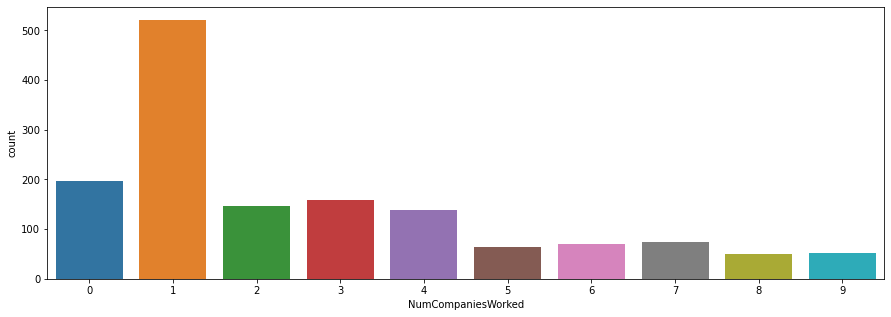

In [19]:
# count of people based on the number of companies they have worked for
plt.subplots(figsize=(15,5))
sns.countplot(data.NumCompaniesWorked)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

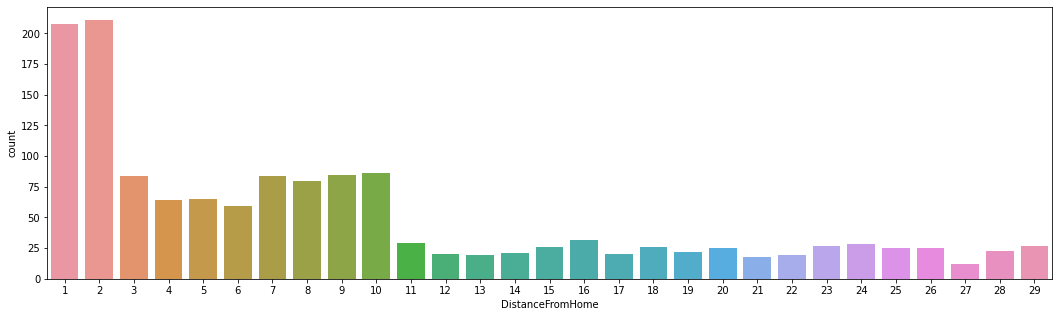

In [20]:
# count of people based on the distance from home they are working.
plt.subplots(figsize=(18,5))
sns.countplot(data.DistanceFromHome)